In [50]:
###################
#インポート
###################

import numpy as np
import matplotlib.pyplot as plt
import statistics
from sklearn.model_selection import train_test_split

In [51]:
###################
#検証データ
###################

X = np.array([
    [-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
    [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
    [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
    [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
    [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
    [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
    [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
    [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
    [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
    [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
    [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
    [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
    [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
    [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
    [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
    [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
    [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
    [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
    [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
    [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ],
])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


#--------トレイン・テストデータに分割--------
X_train, X_test, y_train, y_test = \
train_test_split(X,y,train_size=0.7,random_state=True)

print("X_train.shape:{}".format(X_train.shape)) #------検証中--------
print("X_test.shape:{}".format(X_test.shape)) #------検証中--------
print("y_train.shape:{}".format(y_train.shape)) #------検証中--------
print("y_test.shape:{}".format(y_test.shape)) #------検証中--------

print("X_train:{}".format(X_train)) #------検証中--------
print("X_test:{}".format(X_test)) #------検証中--------
print("y_train:{}".format(y_train)) #------検証中--------
print("y_test:{}".format(y_test)) #------検証中--------

X_train.shape:(28, 2)
X_test.shape:(12, 2)
y_train.shape:(28,)
y_test.shape:(12,)
X_train:[[-0.65259  9.3444 ]
 [ 1.1319   2.4023 ]
 [-3.0603  -3.6461 ]
 [ 0.14654 -0.28733]
 [-0.9888   4.5718 ]
 [-0.57242 -2.9915 ]
 [-0.80647 -2.2135 ]
 [-2.353   -0.72261]
 [-1.281   15.6824 ]
 [ 0.96765 10.083  ]
 [-6.6797   0.67661]
 [-1.9948  -1.3927 ]
 [-2.1086   8.3428 ]
 [ 1.3763   1.3347 ]
 [ 0.56421  0.72888]
 [-2.9362   2.5462 ]
 [-0.60216  8.4636 ]
 [-2.5677  13.1779 ]
 [-1.4621  -2.4586 ]
 [ 0.58619  0.37158]
 [-0.44699 -2.8073 ]
 [ 1.4771   3.4896 ]
 [-3.1625  -3.9606 ]
 [ 0.86291  2.3946 ]
 [-0.73535 -2.2718 ]
 [-0.61251 -0.75345]
 [-3.1108   0.15394]
 [-0.12243  9.0162 ]]
X_test:[[ 0.10645   1.9242  ]
 [ 0.59912   5.3524  ]
 [-3.5944   -4.0112  ]
 [ 0.35084  -0.031994]
 [-2.9452   -1.8219  ]
 [ 0.5461    5.8245  ]
 [ 0.96765   7.8929  ]
 [ 0.057313  5.4681  ]
 [-4.1013   -4.353   ]
 [-2.234    -2.5323  ]
 [ 0.50214  -0.31818 ]
 [ 0.6017    4.3439  ]]
y_train:[1 1 1 1 0 0 0 1 1 1 1 1 0 1 

In [52]:
# 決定木を行うクラス
class ScratchDecesionTreeClassifier:
    """
    パラメータ

    ----------
    出力

 """

    #-------------コンストラクタ-------------
    def __init__(self, verbose=False):
        self.verbose = verbose
        self.threshold = 0 #情報利得が一番高い時のしきい値
        self.feature = 0 #情報利得が一番高い時の目的変数
        self.IG_update = 0 #随時更新される一番大きな情報利得



    #-------------ジニ不純度 を計算する関数-------------
    def _gini_score(self,y):
        """
        ジニ不純度 を計算する関数
        ------パラメータ------
        X:特徴量のndarray
        y:目的変数のndarray

        N[t]:ノードが入ったndarray　t番目のノードと表現
        C[i]:クラスが入ったndarray　i番目のクラスと表現
        i:クラスのインデックス C[i]
        N_t_i:t番目のノードのi番目のクラスのサンプル数
        N_t_all:ｔ番目のノードのサンプル総数
        -----出力
        gini[t]:t番目のノードのジニ不純度、ndarray
        """
        #yの目的変数ndarrayの種類と数量について調べる
        unique,count = np.unique(y,return_counts=True) #yの目的変数の種類と数をunique(ndarray)とcount(ndarray)格納する
        ###unique：目的変数の種類#[0.1]
        ###count：目的変数の0と1の合計数量


        #ダイバーの公式Σ部分とジニ不純度の初期値
        siguma = 0 #Σ部分
        gini = 0 #ジニ不純度

        for i in unique:
            #ｔ番目のノード全体のサンプル数
            N_t_all = np.sum(count)
            #ｔ番目のノードのi番目のサンプル数
            N_t_i = count[unique==i]

            #ジニ負純度を求めるダイバーの公式通り
            siguma += (N_t_i / N_t_all)**2 #公式のΣ部分
            gini = 1-siguma

        return gini #ジニ不純度


    #------情報利得が一番高いしきい値を求めるfit関数------
    def fit(self, X, y):
        """
        情報利得を求める関数
        ------パラメータ
        p:親ノードを示すインデックス
        N_p_all:親ノードのサンプル総数
        N_left_all:クラスの数（判別する値男と女とか）len(C)
        N_right_all:クラスのインデックス C[i]
        -----出力
        IG[p]:情報利益
        """
        #分割前の情報利得
        self.gini_y = self._gini_score(y)

        #情報利得の初期値
        self.IG_update = 0

        #---情報利得が一番大きいしきい値を調べる---
        #Xの特徴量の数を調べる
        feature_num = X.shape[1]

        #Xの全ての特徴量をまたいだユニークなデータの種類を調べる
        for i in range(feature_num):
            self.threshold = np.unique(X[:,i])
            print("i:{}".format(i)) #------検証中--------


            #self.thresholdをしきい値とした時の情報利得を出して一番高い値のself.thresholdを保持していく。
            for j in self.threshold:

                #Xの中で、Xのデータがしきい値self.thresholdより小さい値と大きい値の目的変数ｙの数量
                y_low = y[X[:,i] < j] #しきい値より小さいXに対応するyの数量
                y_high = y[X[:,i] >= j] #しきい値より大きいXに対応するyの数量

                #しきい値より小さいX（y_lowで左のノードのこと）の不純度
                gini_left = self._gini_score(y_low)

                #しきい値より大きいX（y_highで右のノードのこと）の不純度
                gini_right = self._gini_score(y_high)

                #情報利得IGを求める
                IG = self.gini_y - (gini_left + gini_right)
                print("j:{} IG:{}".format(j,IG)) #------検証中--------

                #IG_update（初期0）に最大のIGを常に保持してforする。
                if IG > self.IG_update:

                    #随時更新される一番大きな情報利得
                    self.IG_update = IG  #情報利得の更新値self.IG_updateの初期値は０だがIGを格納して、より大きな情報利得が記録される

                    #情報利得が一番高い時の目的変数
                    self.feature = i

                    #情報利得が一番高い時のしきい値
                    self.threshold = j

                    #しきい値より小さいy_lowグループの目的変数0と1の数量が大きい数字
                    self.l_label = statistics.mode(y_low) #statistics.modeはlの最頻値を出力する(つまりl_labelサイドで一番多い目的変数）

                    #しきい値より大きいy_highグループの目的変数0と1の数量が大きい数字
                    self.r_label = statistics.mode(y_high) #statistics.modeはrの最頻値を出力する(つまりr_labelサイドで一番多い目的変数）



        return self.IG_update,self.feature,self.threshold,self.l_label,self.r_label

    #------テストデータで予測値を出力するpredict関数------
    # def predict(self, X):
    #     if X[:, self.feature ] < self.IG_update:
    #         return self.l_label
    #     elif X[:, self.feature ] > self.IG_update:
    #         return self.r_label

    #------テストデータで予測値を出力するpredict関数------
    def predict(self, X):
        """
        【パラメータ】
        X:テストデータ
         ----------
        【出力】
        IG_update：随時更新される一番大きな情報利得　IG_update:{}".format(IG_update)) #------検証中--------
        feature：情報利得が一番高い時の目的変数　self.feature:{}".format(feature)) #------検証中--------
        threshold：情報利得が一番高い時のしきい値　self.threshold:{}".format(threshold)) #------検証中--------
        l_label：しきい値より小さいy_lowグループの目的変数0と1の数量が大きい数字
        r_label：しきい値より大きいy_highグループの目的変数0と1の数量が大きい数字

         """

        #訓練用データの情報利得が一番高い時の目的変数self.featureのテストデータXのndarrayデータを \
        #しきい値self.thresholdと比べて小さければself.l_label、大きければself.r_labelサイドに一番多い目的変数をを出力
        return np.where(X[:,self.feature] < self.threshold,self.l_label,self.r_label)


In [53]:
#--------決定領域の可視化関数--------

from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X,y,model,step=0.01,
                    title='decision region', xlabel='xlabel', ylabel='ylabel',
                    target_names=['1', '0']
                   ):

    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()


i:0
j:-6.6797 IG:[0.]
j:-3.1625 IG:[0.00694269]
j:-3.1108 IG:[-0.49836976]
j:-3.0603 IG:[-0.44744853]
j:-2.9362 IG:[-0.49631519]
j:-2.5677 IG:[-0.48169747]
j:-2.353 IG:[-0.49367516]
j:-2.1086 IG:[-0.47165533]
j:-1.9948 IG:[-0.49020408]
j:-1.4621 IG:[-0.4694052]
j:-1.281 IG:[-0.48551272]
j:-0.9888 IG:[-0.46281926]
j:-0.80647 IG:[-0.47895408]
j:-0.73535 IG:[-0.4872455]
j:-0.65259 IG:[-0.48979592]
j:-0.61251 IG:[-0.48135464]
j:-0.60216 IG:[-0.48850269]
j:-0.57242 IG:[-0.49050092]
j:-0.44699 IG:[-0.48551272]
j:-0.12243 IG:[-0.4694052]
j:0.14654 IG:[-0.49020408]
j:0.56421 IG:[-0.48979592]
j:0.58619 IG:[-0.49367516]
j:0.86291 IG:[-0.46657459]
j:0.96765 IG:[-0.35395408]
j:1.1319 IG:[-0.43464853]
j:1.3763 IG:[-0.49836976]
j:1.4771 IG:[-0.00403124]
i:1
j:-3.9606 IG:[0.]
j:-3.6461 IG:[-0.00403124]
j:-2.9915 IG:[-0.49836976]
j:-2.8073 IG:[-0.44744853]
j:-2.4586 IG:[-0.38173186]
j:-2.2718 IG:[-0.3292589]
j:-2.2135 IG:[-0.28798186]
j:-1.3927 IG:[-0.25396825]
j:-0.75345 IG:[-0.38520408]
j:-0.72261 I

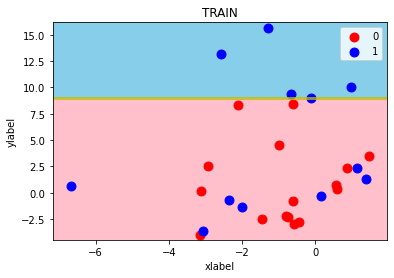

In [54]:
#-------------データセットファンクション呼び出し-----------

#sample2でScratchDecesionTreeClassifierクラスをインスタンス化
sample2 = ScratchDecesionTreeClassifier(verbose=True)

#sample2インスタンスのfitメソッドを呼び出し
IG_update,feature,threshold,l_label,r_label = sample2.fit(X_train, y_train)

print("-------sample2呼び出し--------")
print("随時更新される一番大きな情報利得　IG_update:{}".format(IG_update)) #------検証中--------
print("情報利得が一番高い時の目的変数　self.feature:{}".format(feature)) #------検証中--------
print("情報利得が一番高い時のしきい値　self.threshold:{}".format(threshold)) #------検証中--------
print("しきい値より小さいy_lowグループの目的変数0と1の数量が大きい数字　self.l_label:{}".format(l_label)) #------検証中--------
print("しきい値より大きいy_highグループの目的変数0と1の数量が大きい数字　self.r_label:{}".format(r_label)) #------検証中--------

#sample2インスタンスのpredictメソッドを呼び出し
y_pred = sample2.predict(X_test)
print("y_pred:{}".format(y_pred)) #------検証中--------

#sample2インスタンスの可視化
decision_region(X_train,y_train,sample2,target_names=['0', '1'],title='TRAIN')

In [55]:
#------------正解率　適合率　再現率　F1値を表示

# Evaluation index
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

accuracy 0.3333333333333333
precision 0.0
recall 0.0
f1 0.0


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
